<a href="https://colab.research.google.com/github/StefanyGuevara/GoogleCollab/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Task 0: Creating a DataFrame with three rows and four columns. I named the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. I also Created an index for the DataFrame
# and g the rows the index values of 'Row1', 'Row2', 'Row3'. I Placed a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Last I Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


In [ ]:
# Task 1: I Imported the data file named meal_demand_train.csv that was provided
# with this data that is used. Print the number of records in this dataset in the
# output.
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/meal_demand_train.csv')
len(df)


456548

In [ ]:
# Question 2: creating aggregate columns using the functions:

# 'checkout_price': 'mean'
# 'emailer_for_promotion': 'mean'
# 'homepage_featured': 'mean'
# 'category': 'nunique'
# 'cuisine': 'count'
# 'op_area': 'mean'
# 'num_orders': 'sum'
# All other columns are ignored and left out of the new df_agg DataFrame.

# Printed out the last record (Week 145) of this df_agg DataFrame and then print the first 10 records of the DataFrame

df_agg = df.groupby('week').agg({
    'checkout_price': 'mean',
    'emailer_for_promotion': 'mean',
    'homepage_featured': 'mean',
    'category': 'nunique',
    'cuisine': 'count',
    'op_area': 'mean',
    'num_orders': 'sum',

})

#df_agg.head(10)
df_agg.tail()

,checkout_price,emailer_for_promotion,homepage_featured,category,cuisine,op_area,num_orders
week,,,,,,,
141,347.367882,0.070794,0.091940,14,3263,4.091603,776240
142,347.298610,0.071340,0.086164,14,3238,4.097468,739661
143,342.346188,0.022995,0.066566,14,3305,4.077186,759926
144,337.252750,0.111448,0.088734,14,3302,4.076287,801197
145,345.015912,0.045594,0.060894,14,3268,4.092656,671926


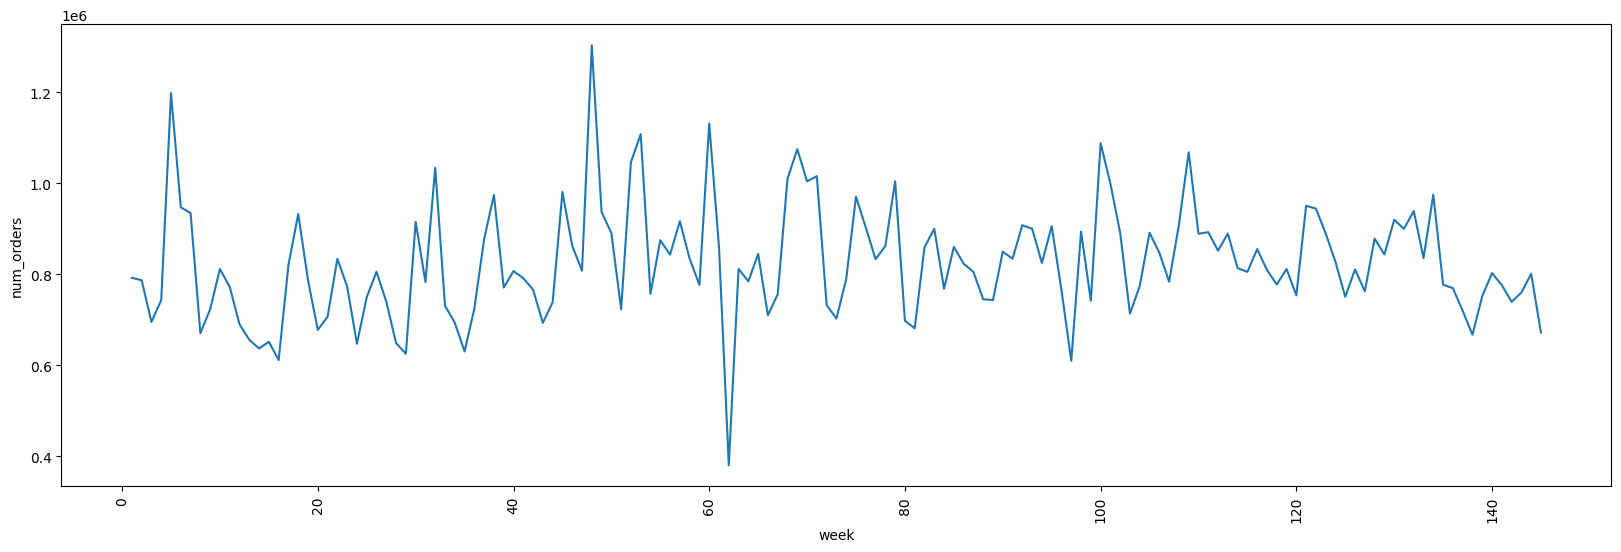

In [ ]:
# Task 3: Printed a line chart to visualize num_orders over time (i.e. week). I used labels for the line graph
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
sns.lineplot(x=df_agg.index, y="num_orders", data=df_agg, ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Task 4: Created a first order moving average (MA) model based on num_orders. Printed out the model results summary.

from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(df_agg.num_orders, order=(0, 0, 1))
model = model.fit()
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  145
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1901.879
Date:                Sun, 11 Feb 2024   AIC                           3809.758
Time:                        00:49:55   BIC                           3818.688
Sample:                             0   HQIC                          3813.387
                                - 145                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.245e+05   1.33e+04     62.123      0.000    7.99e+05    8.51e+05
ma.L1          0.2864      0.086      3.336      0.001       0.118       0.455
sigma2      1.472e+10      0.052   2.84e+11      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Task 5: Created a first-order (i.e. lag=1) auto-regressive model using the AutoReg() object in statsmodels.api. Included a constant and a trend term. Printed a model summary.
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_agg.num_orders, lags=[1], trend='ct', seasonal=False)
model = model.fit()
print(model.summary())




                            AutoReg Model Results                             
Dep. Variable:             num_orders   No. Observations:                  145
Model:                     AutoReg(1)   Log Likelihood               -1889.192
Method:               Conditional MLE   S.D. of innovations         120626.041
Date:                Sun, 11 Feb 2024   AIC                           3786.384
Time:                        00:50:28   BIC                           3798.263
Sample:                             1   HQIC                          3791.211
                                  145                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.92e+05   6.78e+04      8.730      0.000    4.59e+05    7.25e+05
trend           223.0063    243.727      0.915      0.360    -254.691     700.703
num_orders.L1     0.2621      0.081     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Task 6: Created a seasonal autoregressive model integrated with a moving average and included all of the covariates that was created in df_agg. Made both the auto-regression and moving average terms first-order. Include a 12 month seasonality. For that seasonality, I included a 1 period differencing. Printed the model results summary.
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_exog = df_agg[['checkout_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'op_area']]
model = SARIMAX(df_agg.num_orders,exog = df_exog, order=(1, 0, 1), seasonal_order=(0, 1, 0, 12))
model = model.fit(disp=False)
print(model.summary())
#df_exog

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                          num_orders   No. Observations:                  145
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood               -1754.730
Date:                             Sun, 11 Feb 2024   AIC                           3527.460
Time:                                     00:53:07   BIC                           3553.473
Sample:                                          0   HQIC                          3538.031
                                             - 145                                         
Covariance Type:                               opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
checkout_price          -49.5651   1339.686     -0.037      0.970   -2675.301    257

In [ ]:
# Task 7: Imported the data set meal_demand_forecast.csv into a new DataFrame.

# I will use this DataFrame as the exogenous features required to calculate a num_orders forecast for each of the weeks in this DataFrame.

from statsmodels.tsa.statespace.sarimax import SARIMAX

df_mdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/meal_demand_forecast.csv')
df_mdf = df_mdf.groupby(df_mdf["week"]).agg({'checkout_price': 'mean', 'emailer_for_promotion':'mean', 'homepage_featured':'mean', 'category': 'nunique', 'cuisine': 'count', 'op_area': 'mean'})


forecast_sarimax = model.predict(len(df_agg) + 1, len(df_agg) + len(df_mdf) - 1, exog = df_mdf)
print(forecast_sarimax, '\n')

146    724585.884930
147    784155.881430
148    794220.864930
149    789259.616805
150    824195.459822
151    763261.911652
152    735027.506519
153    691067.456499
154    641892.580827
Name: predicted_mean, dtype: float64 



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<ipython-input-21-d8fd12b210aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mdf['num_orders'] = forecast_sarimax


,checkout_price,emailer_for_promotion,homepage_featured,category,cuisine,op_area,num_orders
week,,,,,,,
1,330.530205,0.122177,0.141684,12,2922,4.079877,7.922610e+05
2,323.926944,0.214434,0.177486,12,2896,4.085014,7.870840e+05
3,327.202580,0.035874,0.109003,12,2899,4.078682,6.952620e+05
4,330.160502,0.000000,0.101073,12,2889,4.087747,7.435290e+05
5,315.194676,0.117873,0.162994,12,2859,4.077824,1.198675e+06
...,...,...,...,...,...,...,...
150,335.818599,0.140983,0.118401,14,3277,4.083644,8.241955e+05
151,336.104702,0.131514,0.101117,14,3224,4.096495,7.632619e+05
152,339.202807,0.047502,0.084824,14,3242,4.088896,7.350275e+05


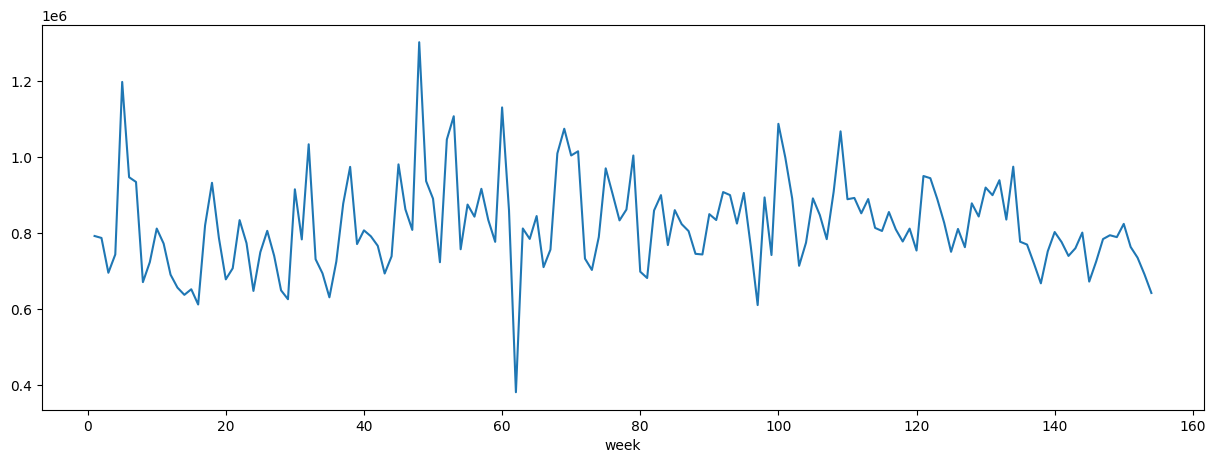

In [ ]:
# Task 8: Added the predictions into a new column titled, 'num_orders' in the aggregated DataFrame I just created for the meal_demand_forecast.csv data. Appended this DataFrame onto the original aggregated DataFrame based on the meal_demand_train.csv data. The columns should line up so that the result is a single DataFrame with weeks 1 - 154. Created a Pandas line plot on the num_orders column so that I can see the original data together with the predictions.


forecast_sarimax  = forecast_sarimax .tolist()

df_mdf = df_mdf[:-1]

df_mdf['num_orders'] = forecast_sarimax

df_agg = pd.concat([df_agg, df_mdf])
df_agg.num_orders.plot(figsize=(15,5));
df_agg
